## CS1P Lab Exam 1 
### Practice problem

<div class="alert alert-box alert-danger">
    
You must not import *any* libraries in this code except those already imported for you. 
You may only use concepts and programming constructs from the CS1P course.

</div>

In [1]:
from show_line import show_line, show_many_lines
import math, random # only permitted imports

## Problem

You are asked to make predictions about the weather. You have data recorded as a CSV file. You are asked to load the data, and create a model that will make simple predictions. In this case, you will be asked to fit a line to a collection of measurements.


**Marks are only shown to show how the actual exam will be broken down for marking; there are no marks for the practice problem.**

## 1. Load the data [12 marks]

The data you will load is a measurement of environmental data recorded daily over several months in New York. The data you have is formatted as follows:

       day,temp_f
    
        
That is,
* each line is a comma-separated pair with a day number and a daily temperature in Farenheit. 
* All values are positive numbers. 
* There may be any number of spaces at the start or end of a line, or around delimiters. 
    
The data is in a file `data/ny_data_basic.txt`. There are exactly 80 pairs of measurements in this file.

You must define two functions:
* `parse_line(s)` must parse a string representing *one line* of the file and return the data for that line (i.e. a day number and a temperature).
* `load_data(fname)` must take a filename and return all of the data loaded from `fname`.

Temperatures should be converted from Farenheit to Celcius using the formula: deg_c = 5/9 * (deg_f-32)



In [2]:
## Your code here
def parse_line(s):
    data = s.strip().split(',')
    return int(data[0]), float(data[1])

def load_data(fname):
    with open(fname) as f:
        res = []
        lines = f.readlines()
        for i in lines:
            day, deg_f = parse_line(i)
            deg_c = 5/9 * (deg_f - 32)
            res.append([day, float("%.2f" % deg_c)])
        return res

In [3]:
# load the data file
data = load_data('data/ny_data_basic.txt')

## 1.T: Validate the data loading [8 marks]

Write tests that will validate that this code works correctly using `assert`. You should, in particular, test `parse_line`. You may assume that the data will always be in the format specified above.

In [4]:
assert "parse_line" in globals(), "You did not define parse_line"
assert "load_data" in globals(), "You did not define load_data"

## Your tests here
assert parse_line("6,   66.0") == (6, 66.0)
assert parse_line("6,66.0    ") == (6, 66.0)
assert parse_line("  6    ,   66.0  ") == (6, 66.0)
assert parse_line("666,   99999999.0") == (666, 99999999.0)

with open('data/ny_data_basic.txt') as f:
    lines = f.readlines()
    assert data[0][1] == float( "%.2f" % (5/9 * (parse_line(lines[0])[1] - 32)) )
print(data)

[[1, 19.44], [2, 22.22], [3, 23.33], [4, 16.67], [5, 13.33], [6, 18.89], [7, 18.33], [8, 15.0], [9, 16.11], [10, 20.56], [11, 23.33], [12, 20.56], [13, 18.89], [14, 20.0], [15, 14.44], [16, 17.78], [17, 18.89], [18, 13.89], [19, 20.0], [20, 16.67], [21, 15.0], [22, 22.78], [23, 16.11], [24, 16.11], [25, 13.89], [26, 14.44], [27, 13.89], [28, 19.44], [29, 27.22], [30, 26.11], [31, 24.44], [32, 25.56], [33, 23.33], [34, 19.44], [35, 28.89], [36, 29.44], [37, 26.11], [38, 27.78], [39, 30.56], [40, 32.22], [41, 30.56], [42, 33.89], [43, 33.33], [44, 27.78], [45, 26.67], [46, 26.11], [47, 25.0], [48, 22.22], [49, 18.33], [50, 22.78], [51, 24.44], [52, 25.0], [53, 24.44], [54, 24.44], [55, 24.44], [56, 23.89], [57, 25.56], [58, 22.78], [59, 26.67], [60, 25.0], [61, 28.33], [62, 28.89], [63, 29.44], [64, 27.22], [65, 28.89], [66, 28.33], [67, 28.33], [68, 31.11], [69, 33.33], [70, 33.33], [71, 31.67], [72, 27.78], [73, 22.78], [74, 27.22], [75, 32.78], [76, 26.67], [77, 27.22], [78, 27.78], [

## 2. Fit a line [10 marks]

You need to fit a straight line to this data, i.e. find the best straight line that comes close to these pairs of values. 

The equation of a straight line is: $$y=mx+c$$

To fit a line to data, we need two things: 
1. a function to measure how bad a proposed line fit -- that is the total error for some values for m and c -- is to some data consisting of x,y measurements;
1. a procedure for incrementally adjusting m and c so that it is a better fit to some data.

### Error
The badness of a fit (or *error*) for a choice of `m` and `c` can be measured for any specific data point `x, y` and computing: `error = (y - m * x + c)**2` and the overall error can be computed by summing this across all data points.

### Adjustment
To adjust the fit, implement the following procedure:
* randomly guess an initial value for m and c
* then, repeat N times
    * adjust m and c by a small random amount
    * compute the error with this adjusted guess
    * if the result is better (error is smaller)
        * make the new adjusted m,c the current best guess

An initial random guess for m and c can be produced using `random.uniform(a,b)` which generates a random number between `a` and `b`.  The function `random.gauss(x, s)` returns a random number close to `x` whose range is determined by `s` -- larger `s` makes bigger "jumps".

* Assume that `m` must be between [-10, 10] and `c` must be between [-100, 100]
* Assume that you will adjust estimates of `m` by 0.05 and `c` by 0.5 on each guess
    
Write a function `fit_line(data, N=10000)` which will fit a line to data, in the format returned by `load_data()`, and return `m` and `c` using `N` update steps. You may wish to break this down into simpler functions.  If your function works, the line fitting error should go down as N increases.

**To make sure your results are repeatable, call `random.seed(2019)` at the very start of your `fit_line` function.**



In [5]:
## Your code here
def get_error(data, m, c):
    res = 0
    for i in data:
        x = i[0] # Day
        y = i[1] # Temperature (in degrees C)
        #print("x:", x, "y:", y)
        res = res + (y - m * x - c)**2
    return res
    
def fit_line(data, N = 10_000):
    random.seed(2019)
    m = random.uniform(-10,10)
    c = random.uniform(-100,100)
    
    m_temp = m
    c_temp = c
    
    #print(m,c)
    old_err = get_error(data, m, c)
    for i in range(N):
        m_temp = random.gauss(m, 0.05)
        c_temp = random.gauss(c, 0.5)
        
        new_err = get_error(data, m_temp, c_temp)
        #print("Old:", old_err, "New:", new_err)
        if new_err < old_err:
            #print("New error!", new_err)
            m = m_temp
            c = c_temp
            #print("m:", m)
            #print("c:", c)
            old_err = new_err
    return m, c

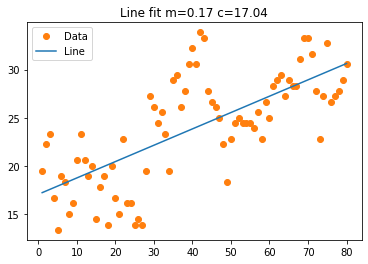

In [6]:
# show the line fit perfomance
m,c = fit_line(data, N = 10_000)
show_line(data, m, c) # this will show your fit

## 2.T Validate the line fitting [5 marks]

 Write tests to validate the functions you have written. Test *all* of the functions you implement!

In [7]:
## Your tests here
print(fit_line([[1,2]], N = 1))

(6.6734570467486645, 57.67442908914102)


## 3. Line fitting variant [8 marks]
Write a function `partial_fits(data, N)` which implements the following algorithm. You must implement the following algorithm carefully:

* For `i` ranging from 0 up to the number of data points
    * Take the first `i` data points *only*;
    * Fit a line to those first `i` points using the `fit_line` function you defined above.
    * Record the m and c for the line fit to *that subset* in a list
* Return a list of *all* `N` fits, i.e. one [m,c] pair for each subset of the data.

In [8]:
## Your code here
def partial_fits(data, N):
    res = []
    for i in range(len(data)):
        m, c = fit_line(data[:i+1])
        res.append([m,c])
    return res[:N]

## 3.T Test the line fitting variant [3 marks]

In [9]:
## Your tests here


## 4. Apply line fitting  [4 marks]
Use your `partial_fit` function on the data you loaded in Part 1. The pre-defined function `show_many_lines(data, fits, ranges)` takes two lists and plots a graph given:
* `fits` a list of m,c pairs representing a line fit
* `ranges` a list of [start, end] ranges representing indices of data that correspond to those fits (i.e. the indices representing the subsets of data used to compute those fits).

You should plot a graph that looks like below:
<img src="partial_fit.png">

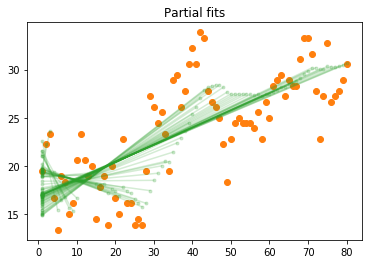

In [10]:
## Your code here
fits = partial_fits(data, len(data))
ranges = [[0,i+1] for i in range(len(data))]

show_many_lines(data, fits, ranges)